# Cifar training visualization

In [1]:
import argparse

import torch
import numpy as np
import matplotlib.pyplot as plt

from scripts.cifar.train import Experiment, parser
from src.trainer.cifar import image_compare_reconstructions

# Set manual seeds
torch.manual_seed(1)

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

## Load module

In [2]:
args = parser.parse_args(args=[
    "--gpus", "1",
    "--num-workers", "4",
    "--load-path", "checkpoints/vqvae-cifar-train/2022_05_20__110212.ckpt"
])
Experiment.exp_name = "vqvae-cifar-visu"
exp = Experiment(args)
exp.datamodule.setup()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Files already downloaded and verified
Files already downloaded and verified


## Compute and plot reconstructions

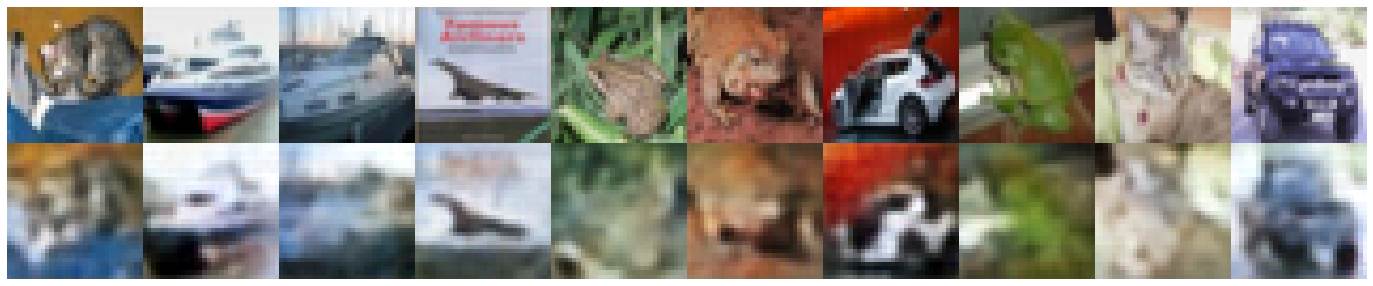

In [3]:
n_images = 10

for images in exp.datamodule.val_dataloader():
    break
images = images[:n_images]
with torch.no_grad():
    reconstructions = exp.litmodule.model(images)
    
plt.imshow(image_compare_reconstructions(images, reconstructions).permute(1, 2, 0).numpy())
plt.axis("off")
plt.show()

## Compute reconstruction cost on the validation set

In [4]:
exp.trainer.validate(exp.litmodule, exp.datamodule);

/home/maxcohen/vqvae/vqvae/.env/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_reconstruction_loss': 0.11184350401163101}
--------------------------------------------------------------------------------
